ID: **920482020**

In [567]:
# import the necessary libraries
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(11.7,7.27)})

In [71]:
# Load Twitter API secrets to variables
consumer_key = "CONSUMER_KEY"
consumer_secret = "CONSUMER_SECRET"
access_token = "ACCESS_TOKEN"
access_token_secret = "ACCESS_TOKEN_SECRET"

# Connect to Twitter API using the secrets
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth,wait_on_rate_limit=True)

In [8]:
#read the government officials and influencers account files
govt = open("government_officials.csv", "r").readlines()
inf = open("influencers.csv", "r").readlines()

#store the handles in a list
govt_officials = [i.rstrip("\n") for i in govt]
influencers = [i.rstrip("\n") for i in inf]

['@Trevornoah',
 '@GarethCliff',
 '@SAPresident',
 '@News24',
 '@Julius_S_Malema',
 '@helenzille',
 '@mailandguardian',
 '@5FM',
 '@loyisogola',
 '@Computicket',
 '@MTVbaseAfrica',
 '@OfficialCSA',
 '@702JohnRobbie',
 '@UlrichJvV',
 '@euphonik',
 '@BBCAndrewH',
 '@Camfed',
 '@BobSkinstad',
 '@SamsungSA',
 '@liveamp',
 '@hartleyr',
 '@SmithInAfrica',
 '@gertjohan',
 '@_AfricanUnion',
 '@SandtonCity',
 '@ParliamentofRSA',
 '@Mo_IbrahimFdn',
 '@NDOCKenya',
 '@PeterGreste',
 '@JendayiFrazer',
 '@art2gee',
 '@IECSouthAfrica',
 '@forbesafrica',
 '@Entrepreneur_SA',
 '@geoffreyyork',
 '@The_New_Age',
 '@HenleyAfrica',
 '@IFCAfrica',
 '@africaprogress',
 '@MbuyiseniNdlozi',
 '@FoodBlogCT',
 '@AfricaResearch',
 '@MadeItInAfrica',
 '@cnbcafrica',
 '@willintune',
 '@AfricaGoodNews',
 '@ThinkAfricaFeed',
 '@CityofJoburgZA',
 '@theafricareport',
 '@Afrinnovator',
 '@schneiderhome',
 '@TheStar_news',
 '@rangerdiaries',
 '@daniel_howden',
 '@Aynte',
 '@GautengProvince',
 '@TechCentral',
 '@africamedi

In [103]:
# Get the screen_name, followers_count and friends_count for the government_officials

data = {}
data['screen_name'] = []
data['followers_count'] = []
data['friends_count'] = []
data['status'] = ["government_official" for i in govt_officials]
for user in govt_officials:
    try:
        u = auth_api.get_user(user)
        data['screen_name'].append(u.screen_name) # append screen name to key in dict
        data['followers_count'].append(u.followers_count) # append followers count to key in dict
        data['friends_count'].append(u.friends_count) # append friends count to key in dict
    except Exception: # Accounts with issues are excluded
        pass

In [104]:
#Do the same for the influencers

for user in influencers:
    try:
        u = auth_api.get_user(user)
        data['screen_name'].append(u.screen_name)
        data['followers_count'].append(u.followers_count)
        data['friends_count'].append(u.friends_count)
    except Exception: # Accounts with issues are excluded
        pass
    
for user in data["screen_name"][36:]:
    data['status'].append("influencer")

In [24]:
# get the total follower_count and retweet_count of the last 500 tweets (constraint)

data['favorite_count'] = []
data['retweet_count'] = []
for screen_name in data['screen_name']:
    favorite_counts = []
    retweet_counts = []
    
    for page in tweepy.Cursor(auth_api.user_timeline, screen_name=screen_name,count=100,include_rts=False,tweet_mode='extended').pages(5):
        favorite_count = sum([tweet.favorite_count for tweet in page]) # contains sum(favorite_count) in a page
        favorite_counts.append(favorite_count) # append to favorite_counts to sum later with the sum(favorite_count) of other pages
        retweet_count = sum([tweet.retweet_count for tweet in page]) # contains sum(retweet_count) in a page
        retweet_counts.append(retweet_count) # append to retweet_counts to sum later with the sum(retweet_count) of other pages
    
    # append total sum(favorite_counts) and total sum(retweet_counts) of an account different lists
    data['favorite_count'].append(sum(favorite_counts)) # append total sum(favorite_count) of an account to list
    data['retweet_count'].append(sum(retweet_counts)) # append total sum(retweet_count) of an account to list

In [114]:
# load data in dataframe and save to csv
df = pd.DataFrame(data)
# df
df["popularity_score"] = df["retweet_count"] + df["favorite_count"]
df["reach_score"] = df["followers_count"] - df["friends_count"]

# df.to_csv(r'C:\Users\Ajikobi Oluwasegun\Desktop\Data_Science\10 Academy\week 1\Monday\jupyter notebooks\dataset.csv',index=False)

In [585]:
# read data
df = pd.read_csv("dataset.csv")
df

,screen_name,followers_count,friends_count,status,favorite_count,retweet_count,popularity_score,reach_score
0,EswatiniGovern1,11314,82,government_official,12410,3138,15548,11232
1,MalawiGovt,39277,26,government_official,14651,5441,20092,39251
2,hagegeingob,192392,55,government_official,133313,22873,156186,192337
3,FinanceSC,126,224,government_official,123,18,141,-98
4,PresidencyZA,1598788,14,government_official,48796,18188,66984,1598774
...,...,...,...,...,...,...,...,...
124,JamesCopnall,21965,5048,influencer,805,125,930,16917
125,AfricaCheck,68076,4592,influencer,2268,2171,4439,63484
126,AndiMakinana,101275,2838,influencer,11619,6294,17913,98437
127,a24media,31291,3059,influencer,725,227,952,28232


In [640]:
# rank influencers by popularity_score
inf_pop = df.sort_values("popularity_score",ascending=False)[df["status"] == "influencer"].head(10)
inf_pop

c:\users\ajikobi oluwasegun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,screen_name,followers_count,friends_count,status,favorite_count,retweet_count,popularity_score,reach_score
36,Trevornoah,10806046,325,influencer,2591565,435011,3026576,10805721
73,MbuyiseniNdlozi,1076952,5473,influencer,227200,38877,266077,1071479
40,Julius_S_Malema,3128689,652,influencer,179524,37587,217111,3128037
49,euphonik,1755228,65,influencer,115988,15073,131061,1755163
48,UlrichJvV,1042519,530323,influencer,88771,10475,99246,512196
41,helenzille,1443355,2304,influencer,51025,11416,62441,1441051
47,OfficialCSA,1160180,1998,influencer,44314,6057,50371,1158182
39,News24,3577277,631,influencer,34054,15638,49692,3576646
101,audisouthafrica,215360,1155,influencer,38203,4512,42715,214205
46,MTVBaseAfrica,1416006,109,influencer,32128,5438,37566,1415897


In [641]:
# rank government_officials by popularity_score
govt_pop = df.sort_values("popularity_score",ascending=False)[df["status"] == "government_official"].head(10)
govt_pop

c:\users\ajikobi oluwasegun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,screen_name,followers_count,friends_count,status,favorite_count,retweet_count,popularity_score,reach_score
26,NAkufoAddo,1507429,352,government_official,1407632,232475,1640107,1507077
32,MBuhari,3271425,26,government_official,944726,268636,1213362,3271399
13,SudanPMHamdok,370712,115,government_official,867401,170011,1037412,370597
15,KagutaMuseveni,1812698,28,government_official,756272,139189,895461,1812670
10,PaulKagame,1983425,181,government_official,626447,208559,835006,1983244
6,edmnangagwa,546229,116,government_official,526260,117859,644119,546113
33,Macky_Sall,1375056,171,government_official,422596,67799,490395,1374885
11,M_Farmaajo,424124,2,government_official,298302,62100,360402,424122
19,Presidence_RDC,340564,125,government_official,222165,30791,252956,340439
24,AOuattara_PRCI,832167,23,government_official,188481,33306,221787,832144


In [642]:
# rank influencers by reach_score
inf_reach = df.sort_values("reach_score",ascending=False)[df["status"] == "influencer"].head(10)
inf_reach

c:\users\ajikobi oluwasegun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,screen_name,followers_count,friends_count,status,favorite_count,retweet_count,popularity_score,reach_score
36,Trevornoah,10806046,325,influencer,2591565,435011,3026576,10805721
39,News24,3577277,631,influencer,34054,15638,49692,3576646
40,Julius_S_Malema,3128689,652,influencer,179524,37587,217111,3128037
37,GarethCliff,1974614,356,influencer,27652,5460,33112,1974258
49,euphonik,1755228,65,influencer,115988,15073,131061,1755163
41,helenzille,1443355,2304,influencer,51025,11416,62441,1441051
46,MTVBaseAfrica,1416006,109,influencer,32128,5438,37566,1415897
43,5FM,1164398,411,influencer,12859,1957,14816,1163987
47,OfficialCSA,1160180,1998,influencer,44314,6057,50371,1158182
44,loyisogola,1085238,3948,influencer,20065,2926,22991,1081290


In [643]:
# rank government_official by reach_score
govt_reach = df.sort_values("reach_score",ascending=False)[df["status"] == "government_official"].head(10)
govt_reach

c:\users\ajikobi oluwasegun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,screen_name,followers_count,friends_count,status,favorite_count,retweet_count,popularity_score,reach_score
32,MBuhari,3271425,26,government_official,944726,268636,1213362,3271399
10,PaulKagame,1983425,181,government_official,626447,208559,835006,1983244
15,KagutaMuseveni,1812698,28,government_official,756272,139189,895461,1812670
4,PresidencyZA,1598788,14,government_official,48796,18188,66984,1598774
26,NAkufoAddo,1507429,352,government_official,1407632,232475,1640107,1507077
33,Macky_Sall,1375056,171,government_official,422596,67799,490395,1374885
9,StateHouseKenya,1103652,214,government_official,171366,40655,212021,1103438
24,AOuattara_PRCI,832167,23,government_official,188481,33306,221787,832144
6,edmnangagwa,546229,116,government_official,526260,117859,644119,546113
11,M_Farmaajo,424124,2,government_official,298302,62100,360402,424122


In [629]:
#select top 10 influencers using inf_pop and inf_reach
from collections import Counter
inf_pop_reach = inf_pop + inf_reach # concatenate the lists
count_inf = Counter(inf_pop_reach) # check those that appear in both lists
top10_inf = []
for inf in count_inf:
    if not inf in ["5FM","loyisogola","audisouthafrica"]: 
        top10_inf.append(inf) # select those that appear in both lists and those that have higher reach or popularity from those that didn't appear
top10_inf

['Trevornoah',
 'MbuyiseniNdlozi',
 'Julius_S_Malema',
 'euphonik',
 'UlrichJvV',
 'helenzille',
 'OfficialCSA',
 'News24',
 'MTVBaseAfrica',
 'GarethCliff']

In [638]:
#select top 10 government officials using inf_pop and inf_reach
from collections import Counter
govt_pop_reach = govt_pop + govt_reach # concatenate the lists
count_govt = Counter(govt_pop_reach) # check those that appear in both lists
top10_govt = []
for govt in count_govt:
    if not govt in ["Presidence_RDC", "StateHouseKenya"]: 
        top10_govt.append(govt) # select those that appear in both lists and those that have higher reach or popularity from those that didn't appear
top10_govt

['NAkufoAddo',
 'MBuhari',
 'SudanPMHamdok',
 'KagutaMuseveni',
 'PaulKagame',
 'edmnangagwa',
 'Macky_Sall',
 'M_Farmaajo',
 'AOuattara_PRCI',
 'PresidencyZA']

In [246]:
hashtags_count = {}
hashtags = {}

In [256]:
#extract screen_names as keys in dict(hashtags) and their respective hashtags with their count as values
for screen_name in data['screen_name']:
    hashtags[screen_name]={}
    for status in Cursor(auth_api.user_timeline, screen_name=screen_name).items(500):
    #    tweet_count+= 1
        if hasattr(status, "entities"):
            entities = status.entities
        # get hashtags
        if "hashtags" in entities:
            for ent in entities["hashtags"]:
                if ent is not None:
                    if "text" in ent:
                        hashtag = ent["text"]
                        if hashtag is not None:
                            if hashtag in hashtags[screen_name].keys():
                                hashtags[screen_name][hashtag]+=1
                                hashtags_count[hashtag]+=1
                            else:
                                hashtags[screen_name][hashtag] = 1
                                hashtags_count[hashtag] = 1

In [373]:
#change values of keys in dict(hashtags) to lowercase
def _lowercase(obj):
    if isinstance(obj, dict):
        return {k.lower(): v for k,v in obj.items()}
hashtags_lower = {k: _lowercase(v) for k,v in hashtags.items()}

In [459]:
#get new count for all unique hashtags
hasht_count = {}
for screen_name in hashtags_lower:
    for hasht in hashtags_lower[screen_name]:
        if not hasht in hasht_count.keys():
            hasht_count[hasht] = hashtags_lower[screen_name][hasht] # append the unique hashtag count with it's user count
        else:
            hasht_count[hasht] += hashtags_lower[screen_name][hasht] # increase the unique hashtag count with it's user count

In [463]:
#top 5 unique hashtags
top_5 = sorted(hasht_count, key=hasht_count.get, reverse=True)[:5]
top_5

['covid19', 'africa', 'kenya', 'ethiopia', 'nigeria']

In [582]:
#hashtags with very low engagements
bottom_5 = sorted(hasht_count, key=hasht_count.get, reverse=False)[:5]
bottom_5

['eswatini',
 'taiwan520',
 'malawiinauguration2020',
 '56thindependence',
 'presidentspecialaddress']

In [540]:
# grouping influencers and government offiials top_5_unique_hashtags count in a dict
hashtag_df = {}
hashtag_df["hashtags"] = [hashtag for hashtag in top_5]
hashtag_df["government_officials"] = []
hashtag_df["influencers"] = []
count = len(hashtags_lower)

for hashtag in top_5:
    govt_count = []
    infl_count = []
    for screen_name in data['screen_name']:
        if hashtag in hashtags_lower[screen_name]:
            if count>93: # govt_officials are the first 36 screen_names
                    govt_count.append(hashtags_lower[screen_name][hashtag])
            else:
                infl_count.append(hashtags_lower[screen_name][hashtag])
            count-=1
    hashtag_df["government_officials"].append(sum(govt_count))
    hashtag_df["influencers"].append(sum(infl_count))

In [568]:
hash_df = pd.DataFrame(hashtag_df)
hash_df

,hashtags,government_officials,influencers
0,covid19,422,278
1,africa,0,526
2,kenya,0,184
3,ethiopia,0,173
4,nigeria,0,168


([<matplotlib.axis.XTick at 0x1d07233d5f8>,
 <a list of 5 Text xticklabel objects>)

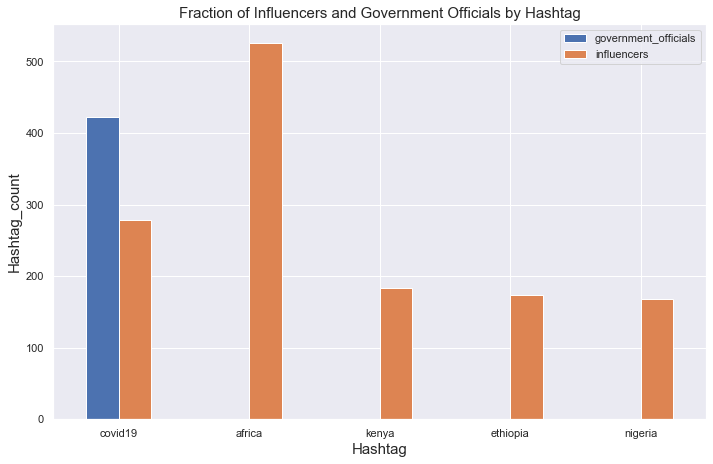

In [576]:
#Bar plot of fraction of influencers and government officials by hashtag
fig, ax = plt.subplots()
hash_df.plot(ax=ax,kind="bar", rot=0)
ax.set_title("Fraction of Influencers and Government Officials by Hashtag", fontsize=15)
ax.set_xlabel("Hashtag", fontsize=15)
ax.set_ylabel("Hashtag_count", fontsize=15)
plt.xticks((0,1,2,3,4),(hash_df["hashtags"]))